In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [0]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=regressor.predict(X_test)

In [0]:
#visualizing
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('training set')
plt.xlabel('years')
plt.ylabel('salary')
plt.show()

**Multiple Linear Regression**

In [0]:
df_m=pd.read_csv('/content/sample_data/50_Startups.csv')
X = df_m.iloc[:,:-1].values
y = df_m.iloc[:, 4].values

In [0]:
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])


In [0]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

In [0]:
X=X[:,1:] #avoid dummy trap


In [0]:
X = X.astype(np.float)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting Test set
y_pred=regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

In [0]:
mse=round((mean_squared_error(y_test,y_pred))/100, 2)
rmse = round((sqrt(mse))/100 ,2)
mse ,rmse

(835028.64, 9.14)

In [0]:
# optimal model by backward elimination
import statsmodels.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

In [0]:
X_opt=X[:,[0,1,2,3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [0]:
X_opt=X[:,[0,1,3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [0]:
X_opt=X[:,[0,3,4,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

In [0]:
X_opt=X[:,[0,3,5]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

**POLYNOMIAL REGRESSION**

In [0]:
poly_df=pd.read_csv('/content/Position_Salaries.csv')
X = poly_df.iloc[:,1:2].values   # make x always as matrix by colon
y = poly_df.iloc[:,2].values

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)

In [14]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.title('polynomial')
plt.show()

**SUPPORT VECTOR REGRESSION**

In [0]:
y=y.reshape(-1,1)

In [0]:
# because other algos contain in built and svr dsnt
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [30]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([252789.13921624])

In [0]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('SVR')
plt.show()

**DECISION TREEEE**

In [41]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('DR')
plt.show()

**RANDOM FOREST REGRESSOR**

In [0]:
rm_df=pd.read_csv('/content/Position_Salaries.csv')
X = rm_df.iloc[:,1:2].values   # make x always as matrix by colon
y = rm_df.iloc[:,2].values

In [55]:
regressor=RandomForestRegressor(n_estimators=300,random_state=0) # 300 is better
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

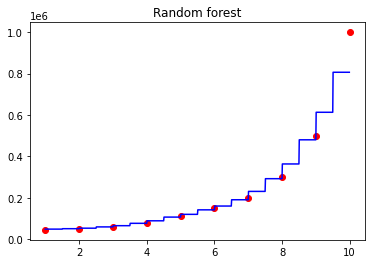

In [56]:
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Random forest')
plt.show()

#plot diff plots in one fig

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#there should be more adjusted r2 for better
